# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import os

from matplotlib import pyplot as plt

# Gather data

In [2]:
df_covid_19 = pd.read_csv("Dataset/covid_19_data.csv")
df_covid_19['Date'] = pd.to_datetime(df_covid_19['ObservationDate'])
df_covid_19['Outbreak'] = 'COVID_2019'
df_covid_19.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'Date', 'Outbreak'],
      dtype='object')

In [3]:
df_sars_03 = pd.read_csv("Dataset/sars_2003_complete_dataset_clean.csv")
df_sars_03['Date'] = pd.to_datetime(df_sars_03['Date'])
df_sars_03['Province/State'] = None
df_sars_03['Outbreak'] = 'SARS_2003'
print(df_sars_03.columns)
df_sars_03.rename({'Cumulative number of case(s)':'Confirmed',
                   'Number of deaths':'Deaths', 'Number recovered':'Recovered', 'Country':'Country/Region'},
                  axis=1,inplace=True)

Index(['Date', 'Country', 'Cumulative number of case(s)', 'Number of deaths',
       'Number recovered', 'Province/State', 'Outbreak'],
      dtype='object')


In [4]:
templ_cols = ['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']
df = pd.concat([df_covid_19[templ_cols], df_sars_03[templ_cols]])
df = df.reset_index(drop=True)

In [5]:
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Province/State'] = df['Province/State'].fillna('Others')
df = df.sort_values(['Country/Region','Province/State','Date'])

In [6]:
df = df.groupby(['Outbreak','Country/Region','Province/State','Date']).agg({'Confirmed':'sum'}).reset_index()
df['Province/State'] = 'all'

In [7]:
t = df.groupby(['Outbreak','Country/Region','Province/State']).agg({'Confirmed':'max'})
t = t.loc[t['Confirmed'] > 50]
df = pd.merge(df,t[[]],left_on=['Outbreak','Country/Region','Province/State'], right_index=True)

In [8]:
df['Country/Region'].value_counts()

Mainland China        2040
US                    1915
Canada                 419
Australia              364
France                 177
                      ... 
Kyrgyzstan              10
Kosovo                   9
Guadeloupe               9
Diamond Princess         3
West Bank and Gaza       2
Name: Country/Region, Length: 123, dtype: int64

In [9]:
country_data = pd.read_csv("Dataset/countries of the world.csv")
country_data['Country'] = country_data['Country'].str.strip()
country_data

Country                               Region  Population  \
0       Afghanistan        ASIA (EX. NEAR EAST)             31056997   
1           Albania  EASTERN EUROPE                          3581655   
2           Algeria  NORTHERN AFRICA                        32930091   
3    American Samoa  OCEANIA                                   57794   
4           Andorra  WESTERN EUROPE                            71201   
..              ...                                  ...         ...   
222       West Bank  NEAR EAST                               2460492   
223  Western Sahara  NORTHERN AFRICA                          273008   
224           Yemen  NEAR EAST                              21456188   
225          Zambia  SUB-SAHARAN AFRICA                     11502010   
226        Zimbabwe  SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0            647500                       48,0                         0,00   
1             28748                      124,6                         1,26   
2           2381740                       13,8                         0,04   
3               199                      290,4                        58,29   
4               468                      152,1                         0,00   
..              ...                        ...                          ...   
222            5860                      419,9                         0,00   
223          266000                        1,0                         0,42   
224          527970                       40,6                         0,36   
225          752614                       15,3                         0,00   
226          390580                       31,3                         0,00   

    Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0           23,06                             163,07               700.0   
1           -4,93                              21,52              4500.0   
2           -0,39                                 31              6000.0   
3          -20,71                               9,27              8000.0   
4             6,6                               4,05             19000.0   
..            ...                                ...                 ...   
222          2,98                              19,62               800.0   
223           NaN                                NaN                 NaN   
224             0                               61,5               800.0   
225             0                              88,29               800.0   
226             0                              67,69              1900.0   

    Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0           36,0               3,2      12,13      0,22     87,65       1   
1           86,5              71,2      21,09      4,42     74,49       3   
2           70,0              78,1       3,22      0,25     96,53       1   
3           97,0             259,5         10        15        75       2   
4          100,0             497,2       2,22         0     97,78       3   
..           ...               ...        ...       ...       ...     ...   
222          NaN             145,2       16,9     18,97     64,13       3   
223          NaN               NaN       0,02         0     99,98       1   
224         50,2              37,2       2,78      0,24     96,98       1   
225         80,6               8,2       7,08      0,03      92,9       2   
226         90,7              26,8       8,32      0,34     91,34       2   

    Birthrate Deathrate Agriculture Industry Service  
0        46,6     20,34        0,38     0,24    0,38  
1       15,11      5,22       0,232    0,188   0,579  
2       17,14      4,61       0,101      0,6   0,298  
3       22,46      3,27         NaN      NaN     NaN  
4        8,71      6,25         NaN      NaN     NaN  
..        ...       ...       

In [10]:
df.loc[df['Country/Region']=='US','Country/Region'] = 'United States'
df.loc[df['Country/Region']=='Mainland China','Country/Region'] = 'China'
df.loc[df['Country/Region']=='Viet Nam','Country/Region'] = 'Vietnam'
df.loc[df['Country/Region']=='UK','Country/Region'] = 'United Kingdom'
df.loc[df['Country/Region']=='South Korea','Country/Region'] = 'Korea, South'
df.loc[df['Country/Region']=='Taiwan, China','Country/Region'] = 'Taiwan'
df.loc[df['Country/Region']=='Hong Kong SAR, China','Country/Region'] = 'Hong Kong'

In [11]:
df = pd.merge(df, country_data, how='left', left_on=['Country/Region'], right_on=['Country'])
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.loc[df['Country'].isnull()]['Country/Region'].value_counts()

Others                    46
North Macedonia           31
Bosnia and Herzegovina    23
Ivory Coast               18
Congo (Kinshasa)          17
Trinidad and Tobago       14
Montenegro                11
Kosovo                     9
Diamond Princess           3
West Bank and Gaza         2
Name: Country/Region, dtype: int64

In [13]:
df.loc[df['Region'].isnull(), 'Region'] = 'Others'
df.loc[df['Country'].isnull(), 'Country'] = 'Undefined'

In [14]:
df['Country'].value_counts()

China            2135
United States    2009
Canada            419
Australia         364
France            177
                 ... 
Venezuela          14
Uzbekistan         13
Mauritius          10
Kyrgyzstan         10
Guadeloupe          9
Name: Country, Length: 109, dtype: int64

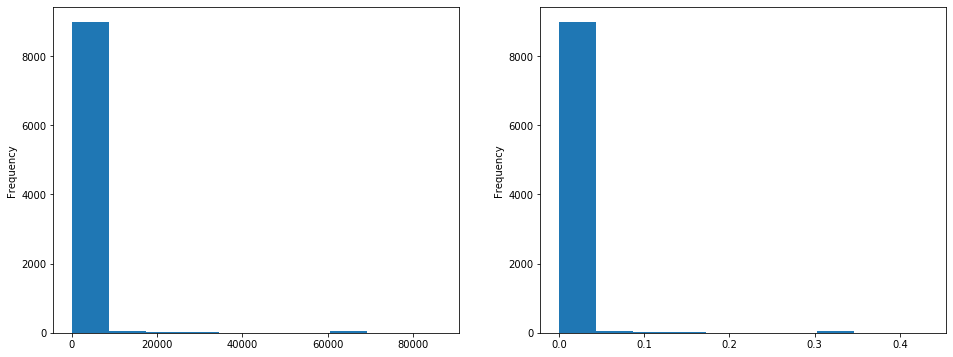

In [15]:
fix, ax = plt.subplots(figsize=(16,6), ncols=2)
s0 = df['Confirmed']
s0.plot.hist(ax=ax[0])

from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler(feature_range=(0,1)).fit(np.asarray([0, 2E5]).reshape(-1,1))

s1 = pd.Series(transformer.transform(s0.values.reshape(-1,1)).reshape(-1))
s1.plot.hist(ax=ax[1])
df['Confirmed_transformed'] = s1

In [16]:
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week

In [17]:
n_lags = 5
for k,v in df.groupby(['Outbreak','Country/Region','Province/State']):    
    for d in range(n_lags,0,-1):                
        df.loc[v.index, f'Confirmed_Lag_{d}'] = v['Confirmed'].shift(d)

        df.loc[v.index, f'Confirmed_Transformed_Lag_{d}'] = v['Confirmed_transformed'].shift(d)

X_mask_lags = [c for c in df.columns if 'Confirmed_Lag_' in c]
X_mask_lags_transformed = [c for c in df.columns if 'Confirmed_Transformed_Lag_' in c]

df[X_mask_lags] = df[X_mask_lags].fillna(0)
df[X_mask_lags_transformed] = df[X_mask_lags_transformed].fillna(0)

print(f'Dataframe shape {df.shape}')

Dataframe shape (9126, 38)
